In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres

d = 2 # Dim de l'espace dans lequel vivent les courbes
n = 1 # Nombre de points des courbes
r = n 

# Coordonnées des 2 courbes

racines_unite_rot = lambda n,theta : np.array([[np.cos(2*k*np.pi/n + theta), np.sin(2*k*np.pi/n + theta)] for k in range(n)])

C1 = np.array([[-1,0],[1,0]])
C2 = np.array([[0,-1],[0,1]])
#C1 = racines_unite_rot(n,0)
#C2 = racines_unite_rot(n,np.pi/n)
#Z = np.array([[0,0]])

In [3]:
# Définition des champs de vecteurs et déformations

noyau_gauss = lambda sigma,x,y : np.exp(-np.linalg.norm(x-y)**2/(2*sigma**2))

def champ_vect(Z,sigma,fam_gen,x): #x est un vecteur de R^d, ou un tableau contenant uniquement de tels vecteurs
    res = np.zeros(d)
    for i in range(r):
        res += noyau_gauss(sigma,Z[i],x)*fam_gen[i]
    return res

def deform(Z,sigma,fam_gen,x):
    return x + champ_vect(Z,sigma,fam_gen,x)

In [3]:
# Ensemble des familles de vecteurs génératrices de V

random_vect = lambda d : np.array([np.random.uniform(-1,1) for _ in range(d)])

ens_fam_gen = [[random_vect(d) for _ in range(r)] for _ in range(10)]

In [ ]:
# Application des déformations à la courbe C1

sigma = 2

plt.figure()

for fam_gen in ens_fam_gen:
    C1_deforme = deform(Z,sigma,fam_gen,C1)
    plt.scatter(C1_deforme[:,0],C1_deforme[:,1])
    
plt.scatter(C2[:,0],C2[:,1], color='black')

plt.show()

NameError: name 'Z' is not defined

In [3]:
# Application des déformations au plan

# Fonction qui renvoie une liste de nb_points points équitablement répartis sur une ligne reliant les points p1 et p2
def interp_points(p1, p2, nb_points):
    x_val = np.linspace(p1[0], p2[0], nb_points)
    y_val = np.linspace(p1[1], p2[1], nb_points)
    return np.vstack([x_val, y_val]).T

# Grille sur le plan R^2
x = np.linspace(-4,4,41)
y = np.linspace(-4,4,41)

# Nombre de points à interpoler sur une ligne
nb_points_interp = 10

# Déterminer de quelle couleur afficher un segment reliant 2 points de la grille selon qu'il soit sur l'axe central ou non
def couleur_segment(i1,j1,i2,j2):
    axe_central = len(x)//2
    if (i1 == axe_central and i2 == i1) or (j1 == axe_central and j2 == j1):
        return 'red'
    else:
        return 'gray'

# Afficher la grille déformée
def plot_grille_deform(f, ax):  
    for i in range(len(x) - 1):
        for j in range(len(y) - 1):
            # Extrémités d'une ligne de la grille d'origine
            p1 = np.array([x[i], y[j]])
            p2_hor, p2_vert = np.array([x[i + 1], y[j]]), np.array([x[i], y[j + 1]])
            couleur_hor, couleur_vert = couleur_segment(i,j,i+1,j), couleur_segment(i,j,i,j+1)
            
            variables = {'p2_hor': p2_hor,'p2_vert': p2_vert,'couleur_hor': couleur_hor,'couleur_vert': couleur_vert}
            
            for direction in ['hor', 'vert']:
                p2 = variables['p2_' + direction]
                couleur = variables['couleur_' + direction]
                
                # Interpolation de la ligne reliant p1 à p2
                ligne_interp = interp_points(p1, p2, nb_points_interp)
                
                # Ligne déformée
                ligne_deform = np.array([f(point) for point in ligne_interp])
                
                # Plot de la ligne déformée
                ax.plot(ligne_deform[:, 0], ligne_deform[:, 1], color=couleur)
    return

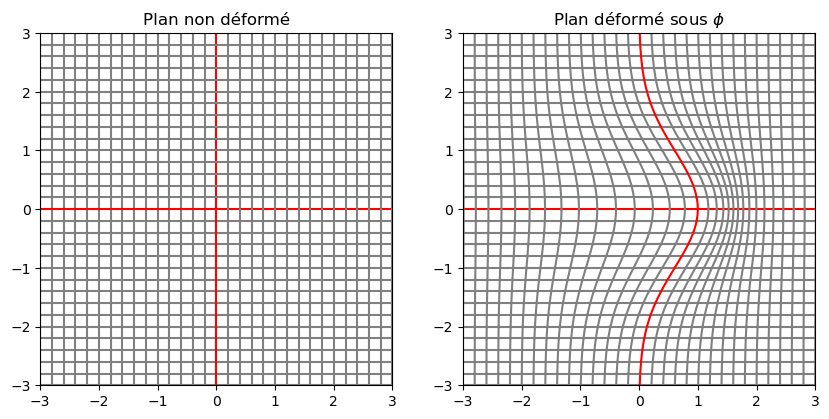

In [135]:
# Comparaison grille d'origine et grille déformée

# Définition des paramètres
Z = np.array([[0,0]])
sigma = 1
fam_gen = [np.array([1,0])]

# Définition de la déformation
phi = lambda x: deform(Z, sigma, fam_gen, x)
    
fig = plt.figure(figsize=(10, 10))

plt.subplots_adjust(wspace=0.2)

# Plot de la grille d'origine
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Plan non déformé')
ax1.set_aspect('equal', adjustable='box')
for i in range(len(x)):
    ax1.plot([x[i], x[i]], [y[0], y[-1]], color=couleur_axe(i))
    ax1.plot([x[0], x[-1]], [y[i], y[i]], color=couleur_axe(i))
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)

# Application de la déformation à la grille d'origine
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Plan déformé sous $\phi$')
ax2.set_aspect('equal', adjustable='box')
plot_grille_deform(phi, ax2)
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)

#plt.savefig('Plan déformé.png', bbox_inches='tight', dpi=300)
plt.show()

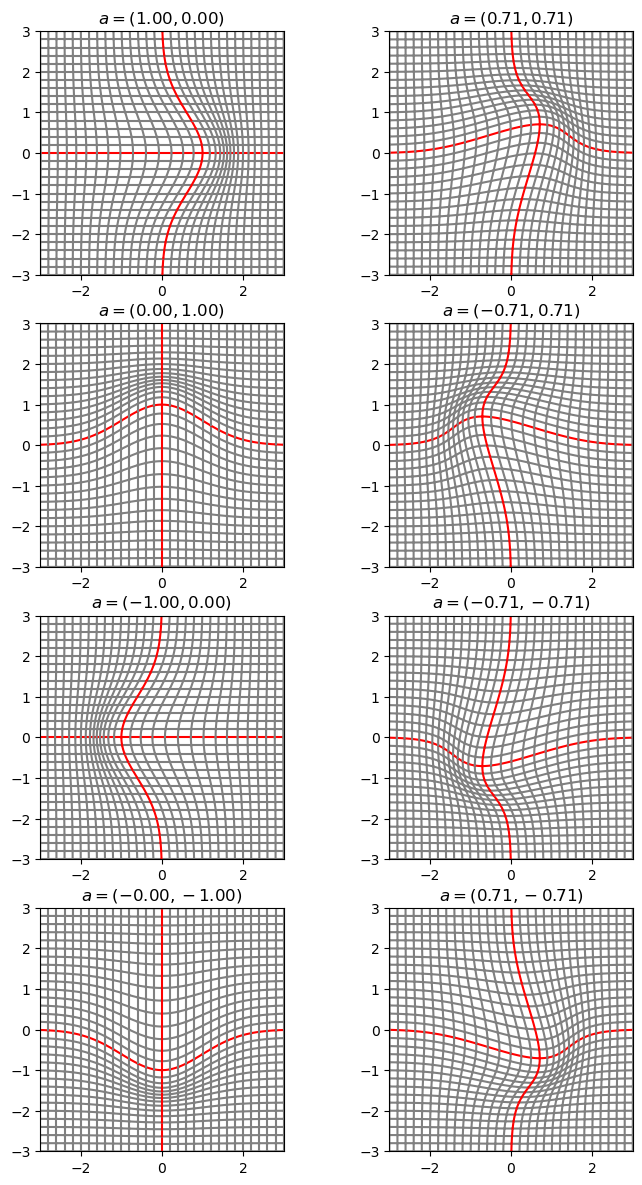

In [169]:
# Comparaison déformation pour différents vecteurs formant la famille génératrice

# Définition des paramètres 
Z = np.array([[0,0]])
sigma = 1
lst_fam_gen = racines_unite_rot(8,0)

fig, axes = plt.subplots(4, 2, figsize=(8, 14))

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for i in range(8):
    row, col = i // 2, i % 2   # Calculer indices de ligne et colomne du subplot
    ax = axes[row, col]  # Accéder au i-ième subplot
    vect_gen = lst_fam_gen[i]
    fam_gen = [np.array(vect_gen)]
    
    # Définition de la déformation
    phi = lambda x: deform(Z, sigma, fam_gen, x)

    ax.set_title(f'$a = ({vect_gen[0]:.2f}, {vect_gen[1]:.2f})$')
    ax.set_aspect('equal', adjustable='box')
    plot_grille_deform(phi, ax)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

#plt.savefig('Vect direct.png', bbox_inches='tight', dpi=300)
plt.show()

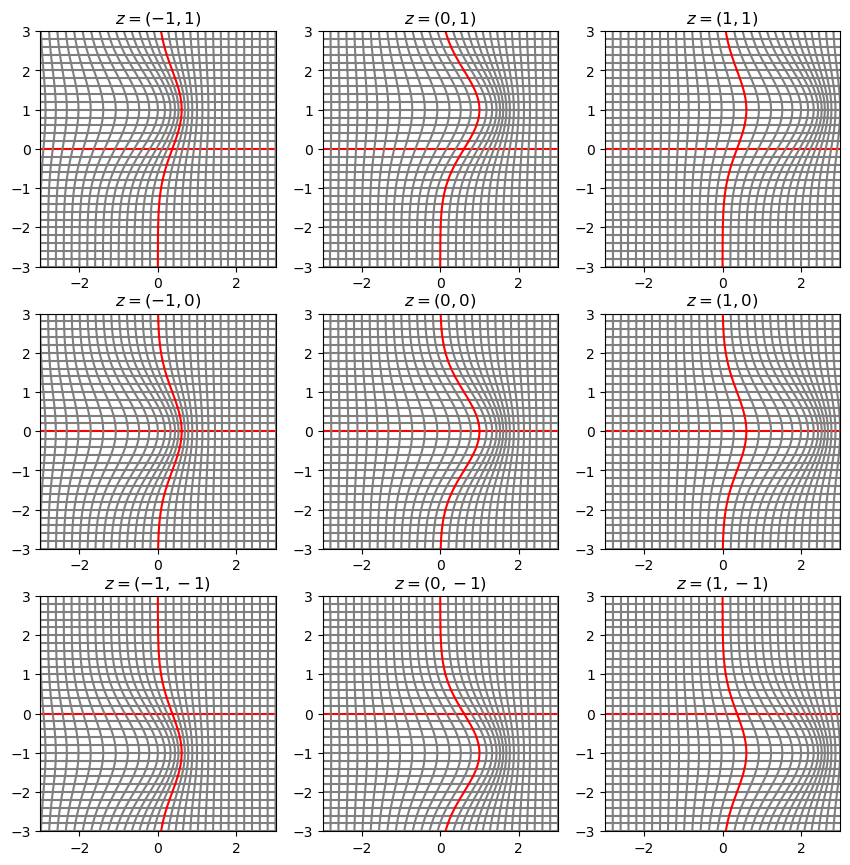

In [167]:
# Comparaison déformation pour différents vecteurs z

# Définition des paramètres
lst_Z = [[-1,1], [0,1], [1,1], [-1,0], [0,0], [1,0], [-1,-1], [0,-1], [1,-1]]
sigma = 1
fam_gen = [np.array([1,0])]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for i in range(9):
    row, col = i // 3, i % 3   # Calculer indices de ligne et colomne du subplot
    ax = axes[row, col]  # Accéder au i-ième subplot
    Z_vect = lst_Z[i]
    Z = np.array([Z_vect])
    
    # Définition de la déformation
    phi = lambda x: deform(Z, sigma, fam_gen, x)

    ax.set_title(f'$z = ({Z_vect[0]}, {Z_vect[1]})$')
    ax.set_aspect('equal', adjustable='box')
    plot_grille_deform(phi, ax)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

#plt.savefig('Vect z.png', bbox_inches='tight', dpi=300)
plt.show()

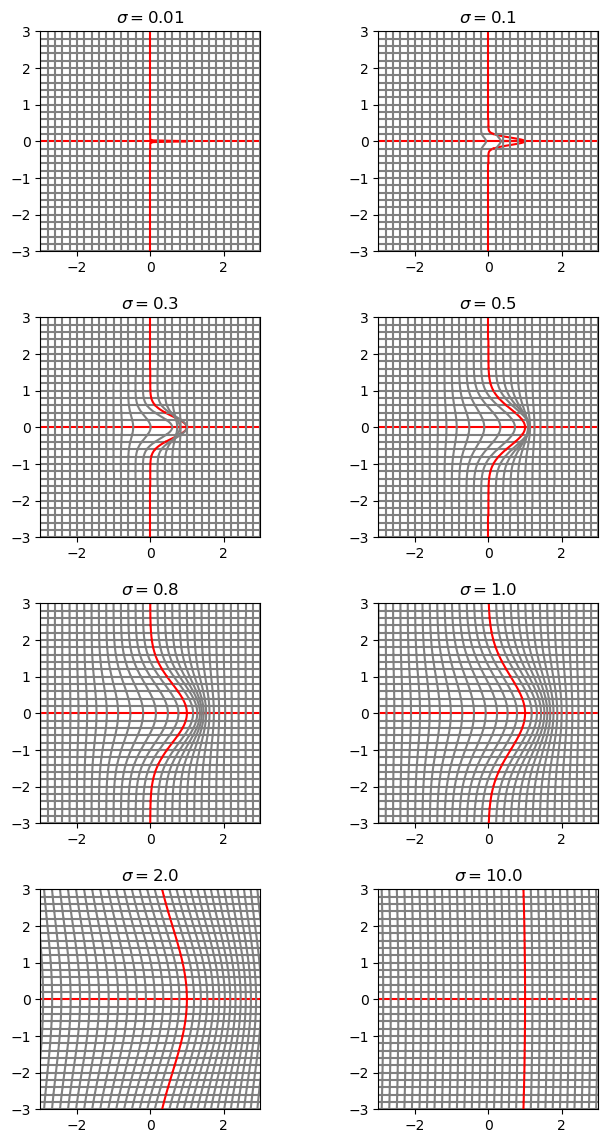

In [152]:
# Influence de sigma sur la déformation

# Définition des paramètres 
Z = np.array([[0,0]])
lst_sigma = [0.01, 0.1, 0.3, 0.5, 0.8, 1.0, 2.0, 10.0]
fam_gen = [np.array([1,0])]

fig, axes = plt.subplots(4, 2, figsize=(8, 14))

plt.subplots_adjust(wspace = 0.2, hspace = 0.3)

for i in range(8):
    row, col = i // 2, i % 2   # Calculer indices de ligne et colomne du subplot
    ax = axes[row, col]  # Accéder au i-ième subplot
    sigma = lst_sigma[i]
    
    # Définition de la déformation
    phi = lambda x: deform(Z, sigma, fam_gen, x)

    ax.set_title(f'$\sigma = {sigma}$')
    ax.set_aspect('equal', adjustable='box')
    plot_grille_deform(phi, ax)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

plt.savefig('Déformations sigma.png', bbox_inches='tight', dpi=300)
plt.show()

In [1]:
# Définition de l'application énergie

dist = lambda C1,C2 : np.sum([np.linalg.norm(C1[i]-C2[i])**2 for i in range(n)])

cout = lambda fam_gen : 1/2*np.sum([np.linalg.norm(fam_gen[i])**2 for i in range(r)])

energie = lambda Z,lambd,sigma,fam_gen : cout(fam_gen) + lambd*dist(deform(Z,sigma,fam_gen,C1),C2)

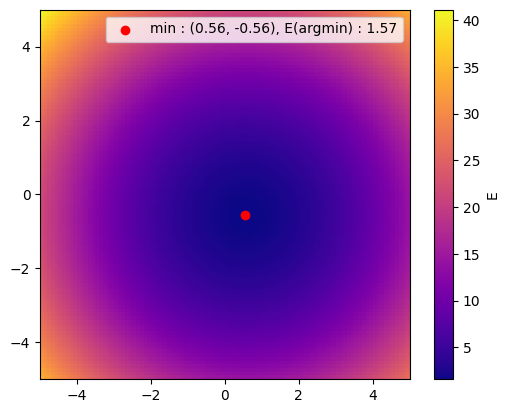

In [6]:
# Plot de la dépendance de l'énergie en la famille génératrice dans le cas d'une famille de taille 1 (1 vecteur) 

Z =  np.array([[0,0]])
lambd = 1
sigma = 1

energie2 = lambda x,y : energie(Z,lambd,sigma,np.array([[x,y]]))

# Créer des valeurs pour x et y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Créer une grille pour x et y
X, Y = np.meshgrid(x, y)

# Créer un tableau contenant les valeurs de l'énergie
energie_val = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        energie_val[j, i] = energie2(X[j, i], Y[j, i])
        
# Déterminer la position du minimum de l'énergie        
min_idx = np.unravel_index(np.argmin(energie_val), np.shape(energie_val))
min_x = X[min_idx]
min_y = Y[min_idx]
min_value = energie_val[min_idx]

# Tracer le plan 2D colorié selon les valeurs de l'énergie
plt.figure()

plt.imshow(energie_val, extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin='lower', cmap='plasma')
plt.colorbar(label='E')

plt.scatter(min_x, min_y, c='red', label=f'min : ({min_x:.2f}, {min_y:.2f}), E(argmin) : {min_value:.2f}')
plt.legend()

#plt.title(f'$\lambda = {lambd}, \sigma = 1$')
plt.savefig('Energie.png', bbox_inches='tight', dpi=300)
plt.show()

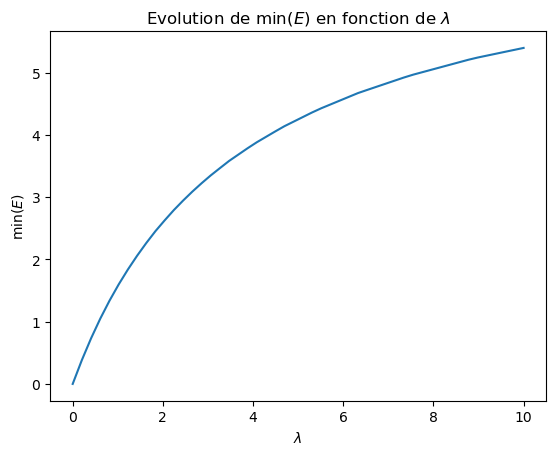

In [17]:
# Dépendance en lambda de l'énergie

Z =  np.array([[0,0]])
sigma = 1

energie2 = lambda x,y : energie(Z,lambd,sigma,[np.array([x,y])])

# Créer des valeurs pour x et y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Créer une grille pour x et y
X, Y = np.meshgrid(x, y)

# Déterminer le minimum de la fonction E
def energie_min(Z,lambd,sigma):
    fonc_energie = lambda x,y : energie(Z,lambd,sigma,[np.array([x,y])])
    energie_val = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(y)):
            energie_val[j, i] = fonc_energie(X[j, i], Y[j, i])
    min_idx = np.unravel_index(np.argmin(energie_val), np.shape(energie_val))
    return energie_val[min_idx]

lambd_val = np.linspace(0, 10, 50)
energie_min_val = np.array([energie_min(Z,lambd,sigma) for lambd in lambd_val])

plt.figure()

plt.plot(lambd_val, energie_min_val)
plt.xlabel('$\lambda$')
plt.ylabel('$\min(E)$')
plt.title('Evolution de $\min(E)$ en fonction de $\lambda$')

plt.savefig('Min lambda.png', bbox_inches='tight', dpi=300)
plt.show()